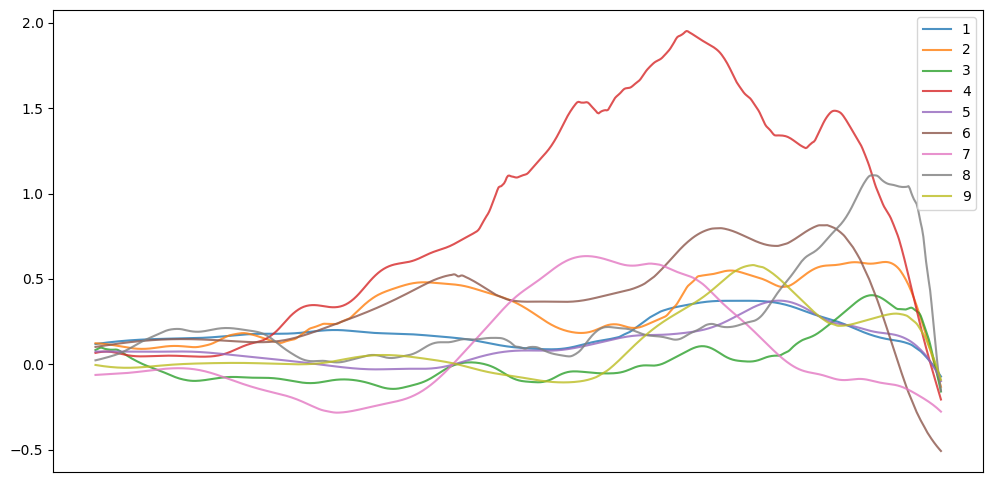

In [127]:
data_file = '../data/CRE.csv'
df = pd.read_csv(data_file)
plt.figure(figsize=(12, 6))
for col in df.columns[1:10]:
    plt.plot(df[col], label=col, alpha=0.8)
plt.legend(loc='upper right')
plt.xticks([])
plt.show()

# plt.figure()
# plt.plot(df['2'].diff().diff().diff())
# plt.show()

In [ ]:
#!/usr/bin/env python3
"""
Generate ONLY the 4 required plots for column 2 with all models superimposed.
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

def load_column2_data():
    """Load column 2 forecast data for all available models."""
    results = {}
    
    # Load all available column 2 data
    model_files = {
        'GBM': '../run_forward/gbm_column_2_results.csv',
        'NBEATS': '../run_forward/nbeats_column_2_results.csv'
    }
    
    # Also try walk-forward results for more models (filter for column 2 if needed)
    walk_forward_files = {
        'Naive': '../run_forward/naive_walk_forward_results.csv',
        'ARIMA Stats': '../run_forward/arima_statsmodels_walk_forward_results.csv',
        'ARIMA v3': '../run_forward/arima_v3_walk_forward_results.csv'
    }
    
    all_files = {**model_files, **walk_forward_files}
    
    for model_name, filepath in all_files.items():
        if os.path.exists(filepath):
            df = pd.read_csv(filepath)
            if all(col in df.columns for col in ['step', 'actual', 'forecast', 'absolute_error']):
                # Calculate MAPE
                df['mape'] = np.abs((df['actual'] - df['forecast']) / df['actual']) * 100
                df = df.dropna()
                results[model_name] = df
                print(f"✓ Loaded {model_name}: {len(df)} points")
    
    return results

def load_extrapolation_data():
    """Load column 2 extrapolation data."""
    # Try latest extrapolation file first
    extrap_files = glob.glob('../forecasts/column2_extrapolation_*.csv')
    extrap_files.sort(reverse=True)  # Get latest
    
    for extrap_file in extrap_files:
        if os.path.exists(extrap_file):
            df = pd.read_csv(extrap_file)
            print(f"✓ Loaded extrapolation data: {extrap_file}")
            return df
    return None

def load_original_data():
    """Load original CRE.csv column 2 data."""
    data_file = '../data/CRE.csv'
    if os.path.exists(data_file):
        df = pd.read_csv(data_file)
        return df['2'].values if '2' in df.columns else None
    return None







In [130]:

results = {}

# Load all available column 2 data
model_files = {
    'GBM': '../run_forward/gbm_column_2_results.csv',
    'NBEATS': '../run_forward/nbeats_column_2_results.csv'
}

# Also try walk-forward results for more models (filter for column 2 if needed)
walk_forward_files = {
    'Naive': '../run_forward/naive_walk_forward_results.csv',
    'ARIMA Stats': '../run_forward/arima_statsmodels_walk_forward_results.csv',
    'ARIMA v3': '../run_forward/arima_v3_walk_forward_results.csv',
    'TFT': '../run_forward/tft_walk_forward_results.csv',
    'NBEATS': '../run_forward/nbeats_walk_forward_results.csv'
}

all_files = {**model_files, **walk_forward_files}

for model_name, filepath in all_files.items():
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        if all(col in df.columns for col in ['step', 'actual', 'forecast', 'absolute_error']):
            # Calculate MAPE
            df['mape'] = np.abs((df['actual'] - df['forecast']) / df['actual']) * 100
            df = df.dropna()
            results[model_name] = df
            print(f"✓ Loaded {model_name}: {len(df)} points")


../forecasts/forecast_metrics_20260107_124923.csv
col2_data = load_column2_data()
print(col2_data.keys())
# col2_data['forecast'] = col2_data['forecast'].astype(float) + 
# col2_data['forecast'].min

col2_data['GBM']
col2_data['Naive']
col2_data['ARIMA Stats']
col2_data['ARIMA v3']
col2_data['TFT']
col2_data['NBEATS']

SyntaxError: invalid syntax (3528678346.py, line 31)

✓ Loaded GBM: 596 points
✓ Loaded Naive: 621 points
✓ Loaded ARIMA Stats: 596 points
✓ Loaded ARIMA v3: 596 points


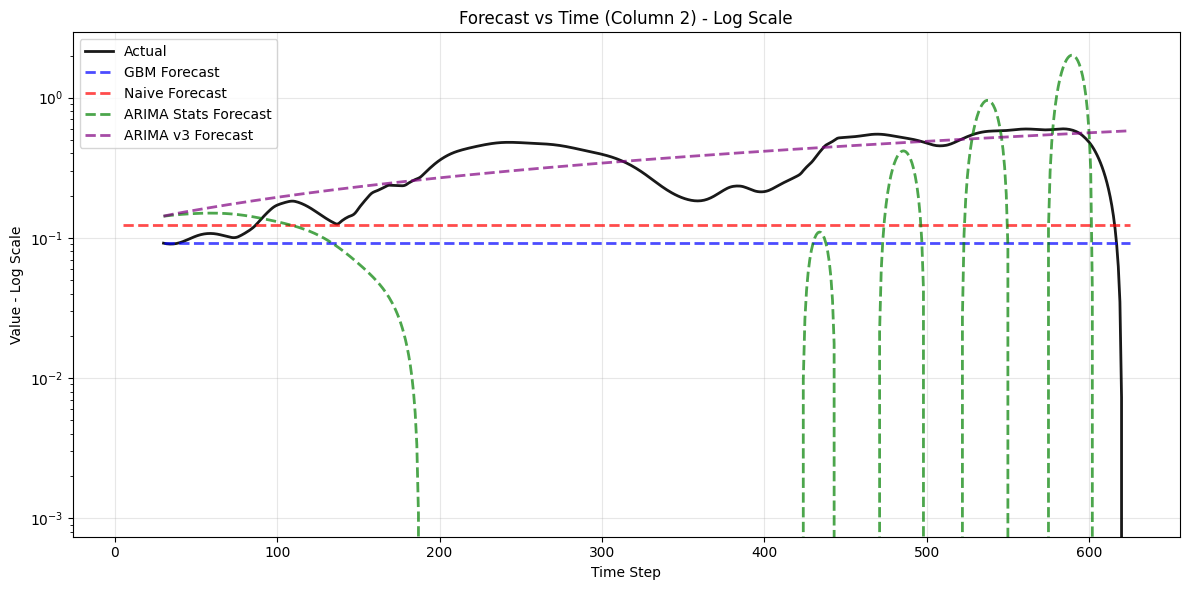

In [ ]:

if not col2_data:
    print("No data for forecast plot")

plt.figure(figsize=(12, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange']

# Get actual values (same for all models)
first_model = list(col2_data.values())[0]
plt.plot(first_model['step'], first_model['actual'], 'black', 
        linewidth=2, label='Actual', alpha=0.9)

# Plot each model's forecasts
for i, (model_name, df) in enumerate(col2_data.items()):
    plt.plot(df['step'], df['forecast'], '--', label=f'{model_name} Forecast',
            color=colors[i % len(colors)], linewidth=2, alpha=0.7)

plt.xlabel('Time Step')
plt.ylabel('Value - Log Scale')
plt.yscale('log')
plt.title('Forecast vs Time (Column 2) - Log Scale')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('forecast_vs_time.png', dpi=300, bbox_inches='tight')

In [31]:
len(original_data)

626

In [52]:
extrap_data

,model,step,value,is_extrapolated
0,gbm,626,0.591055,False
1,gbm,627,0.592180,False
2,gbm,628,0.593498,False
3,gbm,629,0.594909,False
4,gbm,630,0.596303,False
...,...,...,...,...
95,gbm,721,-0.131583,True
96,gbm,722,-0.131583,True
97,gbm,723,-0.131583,True
98,gbm,724,-0.131583,True


✓ Loaded GBM: 596 points
✓ Loaded Naive: 621 points
✓ Loaded ARIMA Stats: 596 points
✓ Loaded ARIMA v3: 596 points


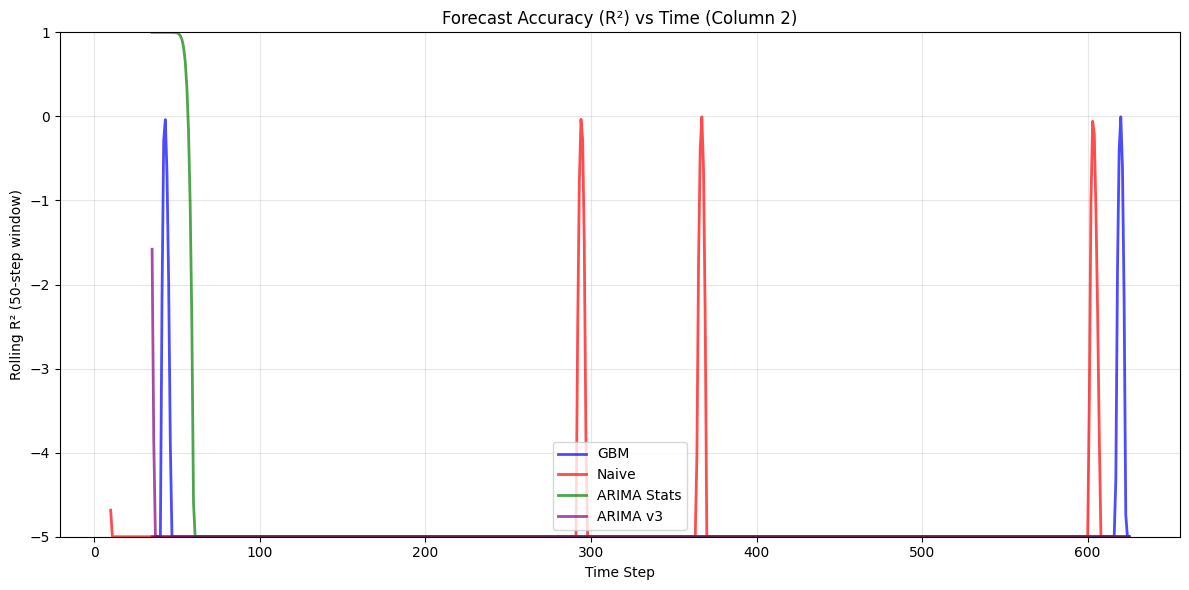

In [37]:
results = load_column2_data()
if not results:
    print("No data for accuracy plot")

plt.figure(figsize=(12, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']

for i, (model_name, df) in enumerate(results.items()):
    # Calculate rolling R² (using 50-step window)
    window_size = min(5, len(df) // 10)
    rolling_r2 = []
    steps = []
    
    for j in range(window_size, len(df)):  # Use all data points, don't skip
        window_actual = df['actual'].iloc[j-window_size:j]
        window_forecast = df['forecast'].iloc[j-window_size:j]
        
        # Calculate R²
        ss_res = np.sum((window_actual - window_forecast) ** 2)
        ss_tot = np.sum((window_actual - np.mean(window_actual)) ** 2)
        r2 = 1 - (ss_res / (ss_tot + 1e-10))  # Avoid division by zero
        
        rolling_r2.append(max(-5, min(1, r2)))  # Wider range, less clamping
        steps.append(df['step'].iloc[j])
    
    if len(rolling_r2) > 0:
        plt.plot(steps, rolling_r2, label=model_name, 
                color=colors[i % len(colors)], linewidth=2, alpha=0.7)

plt.xlabel('Time Step')
plt.ylabel('Rolling R² (50-step window)')
plt.title('Forecast Accuracy (R²) vs Time (Column 2)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-5, 1)  # Wider range
plt.tight_layout()
plt.savefig('accuracy_vs_time.png', dpi=300, bbox_inches='tight')

✓ Loaded extrapolation data: ../forecasts/column2_extrapolation_20260107_124923.csv


In [88]:
extrap_data['model'].unique()

array(['arima_v3', 'naive', 'arima_statsmodels', 'gbm', 'tft', 'nbeats'],
      dtype=object)

In [97]:
def load_extrapolation_data():
    # Try latest extrapolation file first
    extrap_files = glob.glob('../forecasts/column2_extrapolation_20260107_124923.csv')
    extrap_files.sort(reverse=True)  # Get latest
    
    for extrap_file in extrap_files:
        if os.path.exists(extrap_file):
            df = pd.read_csv(extrap_file)
            print(f"✓ Loaded extrapolation data: {extrap_file}")
            return df
    return None

original_data = load_original_data()

extrap_data = load_extrapolation_data()
extrap_data['step'] = extrap_data['step'] + len(original_data)

extrap_data.loc[extrap_data['model'] == 'arima_v3', 'step'] = extrap_data.loc[extrap_data['model'] == 'arima_v3', 'step'] - 30
extrap_data.loc[extrap_data['model'] == 'naive', 'step'] = extrap_data.loc[extrap_data['model'] == 'naive', 'step'] - 29
extrap_data.loc[extrap_data['model'] == 'nbeats', 'step'] = extrap_data.loc[extrap_data['model'] == 'naive', 'step'] - 40
extrap_data.loc[extrap_data['model'] == 'tft', 'step'] = extrap_data.loc[extrap_data['model'] == 'tft', 'step'] - 50
extrap_data.loc[extrap_data['model'] == 'gbm', 'step'] = extrap_data.loc[extrap_data['model'] == 'tft', 'step'] -40 
extrap_data.loc[extrap_data['model'] == 'arima_statsmodels', 'step'] = extrap_data.loc[extrap_data['model'] == 'arima_statsmodels', 'step'] - 30

✓ Loaded extrapolation data: ../forecasts/column2_extrapolation_20260107_124923.csv


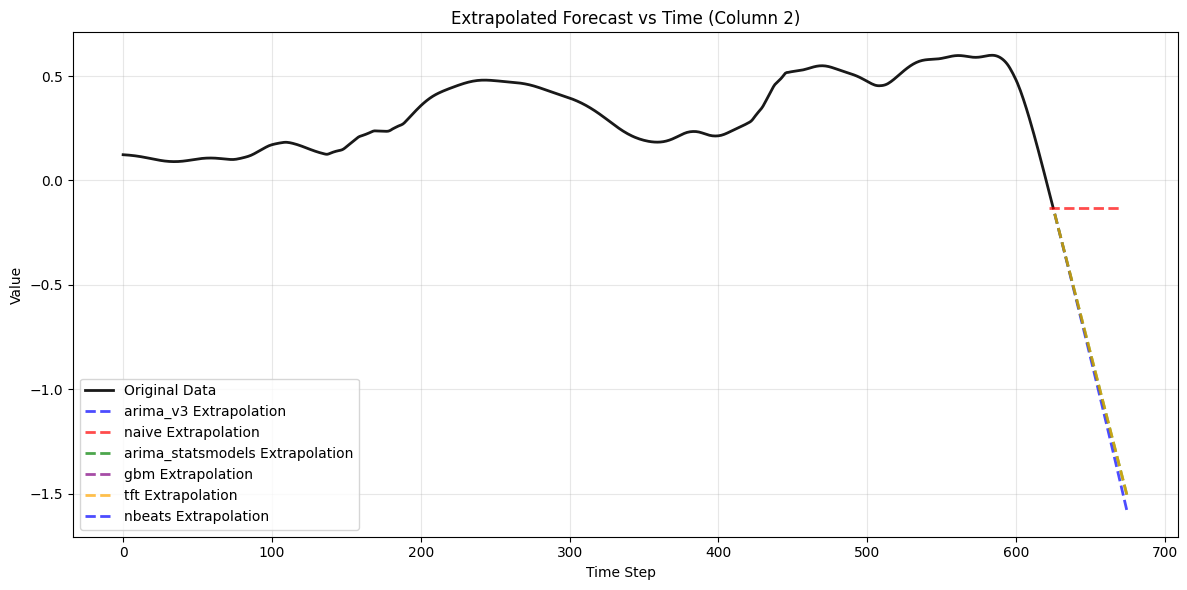

In [ ]:



if original_data is None or extrap_data is None:
    print("No data for extrapolation plot")

plt.figure(figsize=(12, 6))

# Plot original data
time_steps = np.arange(len(original_data))
plt.plot(time_steps, original_data, 'black', linewidth=2, label='Original Data', alpha=0.9)

# Plot extrapolations by model
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i, model_name in enumerate(extrap_data['model'].unique()):
    model_data = extrap_data[extrap_data['model'] == model_name]
    extrap_mask = model_data['is_extrapolated']
    extrap_steps = model_data[extrap_mask]['step']
    extrap_values = model_data[extrap_mask]['value']
    
    if len(extrap_steps) > 0:
        plt.plot(extrap_steps, extrap_values, '--', 
                color=colors[i % len(colors)], linewidth=2, alpha=0.7,
                label=f'{model_name} Extrapolation')

plt.xlabel('Time Step'"""  """)
plt.ylabel('Value')
plt.title('Extrapolated Forecast vs Time (Column 2)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('extrapolation_vs_time.png', dpi=300, bbox_inches='tight')


✓ Loaded GBM: 596 points
✓ Loaded Naive: 621 points
✓ Loaded ARIMA Stats: 596 points
✓ Loaded ARIMA v3: 596 points


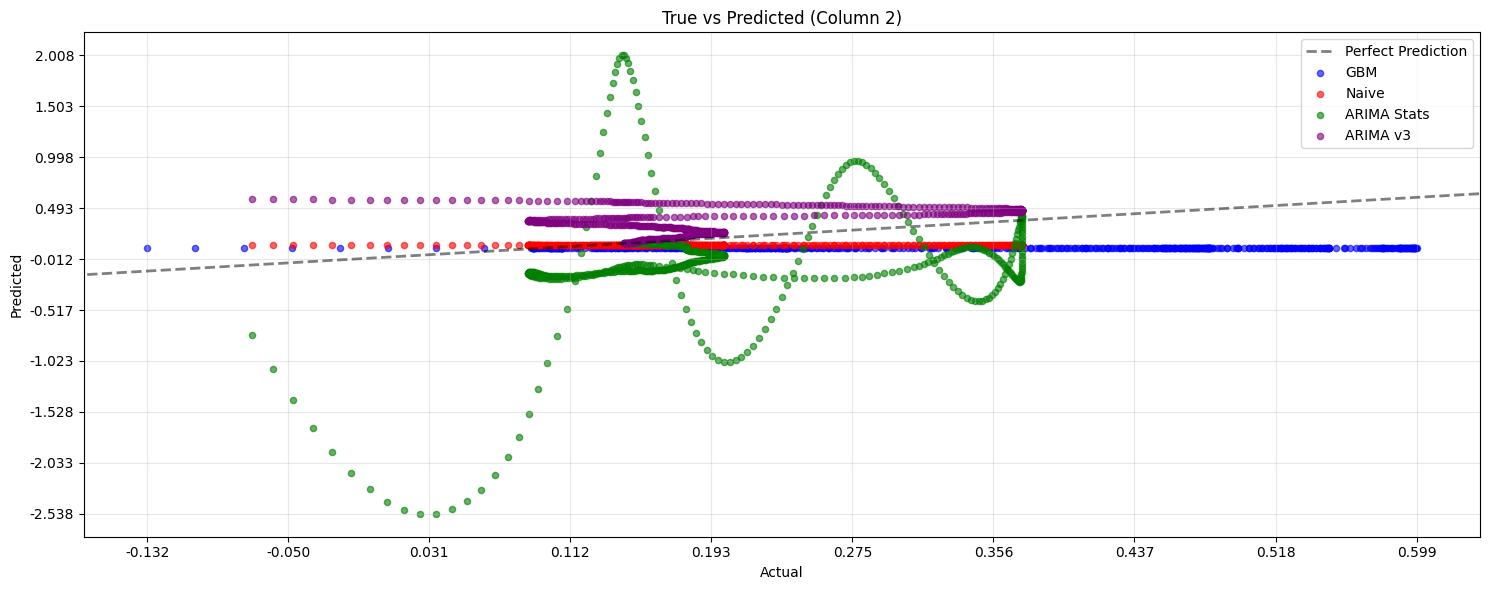

In [13]:
def load_column2_data():
    """Load column 2 forecast data for all available models."""
    results = {}
    
    # Load all available column 2 data
    model_files = {
        'GBM': '../run_forward/gbm_column_2_results.csv',
        # 'NBEATS': '../run_forward/nbeats_column_2_results.csv'
    }
    
    # Also try walk-forward results for more models (filter for column 2 if needed)
    walk_forward_files = {
        'Naive': '../run_forward/naive_walk_forward_results.csv',
        'ARIMA Stats': '../run_forward/arima_statsmodels_walk_forward_results.csv',
        'ARIMA v3': '../run_forward/arima_v3_walk_forward_results.csv'
    }
    
    all_files = {**model_files, **walk_forward_files}
    
    for model_name, filepath in all_files.items():
        if os.path.exists(filepath):
            df = pd.read_csv(filepath)
            if all(col in df.columns for col in ['step', 'actual', 'forecast', 'absolute_error']):
                # Calculate MAPE
                df['mape'] = np.abs((df['actual'] - df['forecast']) / df['actual']) * 100
                df = df.dropna()
                results[model_name] = df
                print(f"✓ Loaded {model_name}: {len(df)} points")
    
    return results

results = load_column2_data()
if not results:
    print("No data for scatter plot")

plt.figure(figsize=(20, 10))
colors = ['blue', 'red', 'green', 'purple', 'orange']

# Collect all actual values to set axis range
all_actual = []
all_forecast = []

for model_name, df in results.items():
    all_actual.extend(df['actual'].values)
    all_forecast.extend(df['forecast'].values)

min_val = min(min(all_actual), min(all_forecast))
max_val = max(max(all_actual), max(all_forecast))
min_val_actual = min(all_actual)
max_val_actual = max(all_actual)
min_val_forecast = min(all_forecast)
max_val_forecast = max(all_forecast)

# Plot perfect prediction line
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, linewidth=2, label='Perfect Prediction')

# Plot each model's scatter
for i, (model_name, df) in enumerate(results.items()):
    plt.scatter(df['actual'], df['forecast'], 
                color=colors[i % len(colors)], alpha=0.6, s=20, label=model_name)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('True vs Predicted (Column 2)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().set_aspect('equal', adjustable='box')

# Set proper axis limits and ticks
xmargin = (max_val_actual - min_val_actual) * 0.05
ymargin = (max_val_forecast - min_val_forecast) * 0.05
plt.xlim(min_val_actual - xmargin, max_val_actual + xmargin)
plt.ylim(min_val_forecast - ymargin, max_val_forecast + ymargin)

# Set dynamic ticks
xtick_range = np.linspace(min_val_actual, max_val_actual, 10)
ytick_range = np.linspace(min_val_forecast, max_val_forecast, 10)
plt.xticks(xtick_range, [f'{x:.3f}' for x in xtick_range])
plt.yticks(ytick_range, [f'{y:.3f}' for y in ytick_range])
plt.gcf().set_size_inches(8, 8)
plt.gca().set_aspect('auto')
plt.gcf().set_size_inches(15, 6)
plt.tight_layout()
plt.savefig('true_vs_predicted.png', dpi=300, bbox_inches='tight')
